In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [22]:
df = pd.read_csv("insurance.csv")

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [25]:
df.duplicated().sum()

np.int64(1)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [28]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [29]:
df['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [30]:
df['sex'].value_counts()

,count
sex,
male,675
female,662


In [31]:
df['sex']  = df['sex'].map({'female': 0 , "male" : 1 })
df['region']  = df['region'].str.lower().map({"southeast" : 1, "southwest" : 2, "northeast" : 3, "northwest" : 4})
df['smoker'] = df['smoker'].map({"yes" : 1, "no" : 0})

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


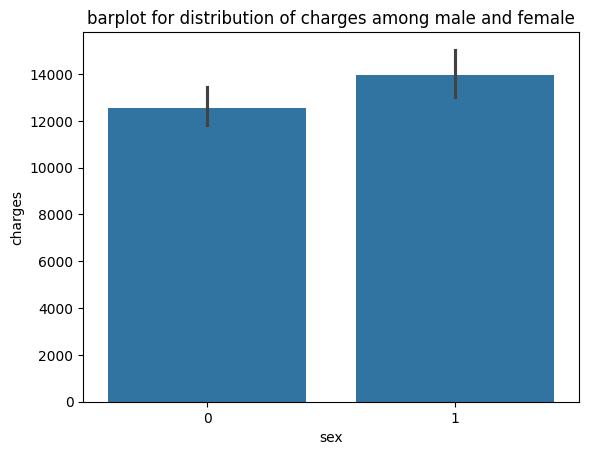

In [34]:
sns.barplot(x = 'sex', y= 'charges',data=df)
plt.xlabel("sex")
plt.ylabel("charges")
plt.title("barplot for distribution of charges among male and female")
plt.show()

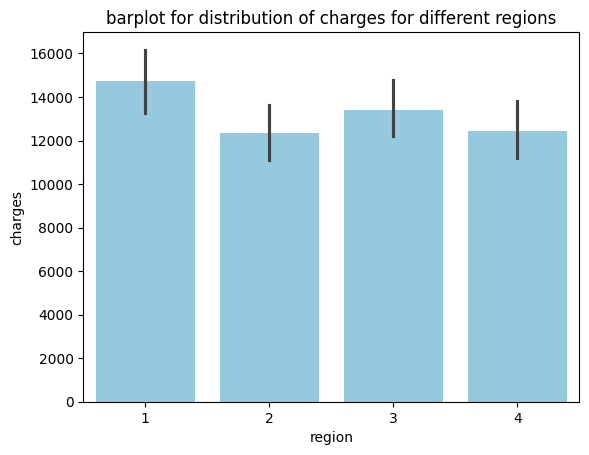

In [36]:
sns.barplot(x= "region",y="charges",data = df,color = "skyblue")
plt.xlabel("region")
plt.ylabel("charges")
plt.title("barplot for distribution of charges for different regions")
plt.show()

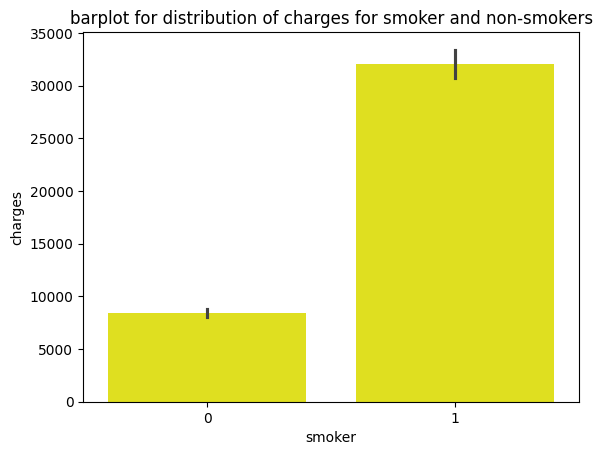

In [38]:
sns.barplot(x= "smoker",y="charges",data = df,color = "yellow")
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title("barplot for distribution of charges for smoker and non-smokers")
plt.show()

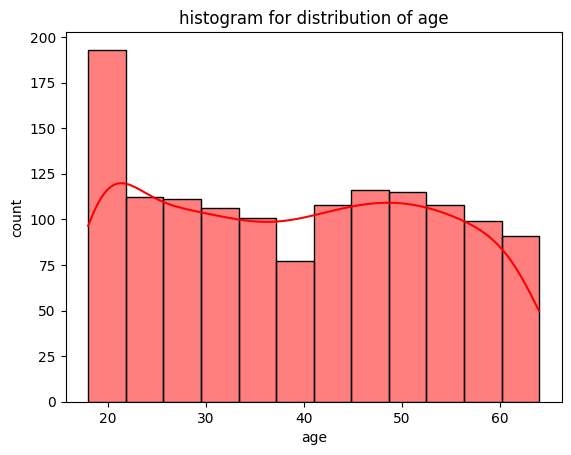

In [43]:
sns.histplot(df['age'],kde=True,color="red")
plt.xlabel("age")
plt.ylabel("count")
plt.title("histogram for distribution of age")
plt.show()

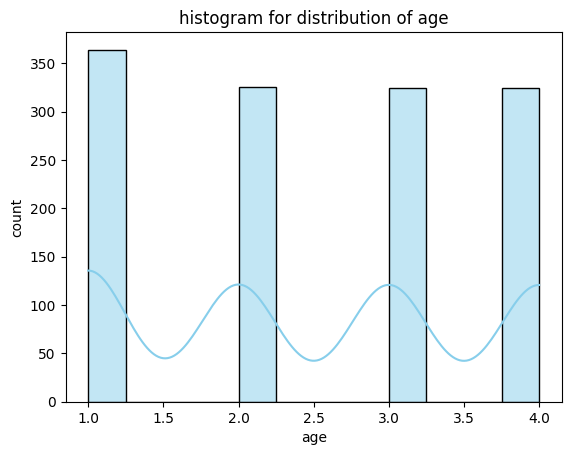

In [45]:
sns.histplot(df['region'],kde=True,color="skyblue")
plt.xlabel("age")
plt.ylabel("count")
plt.title("histogram for distribution of age")
plt.show()

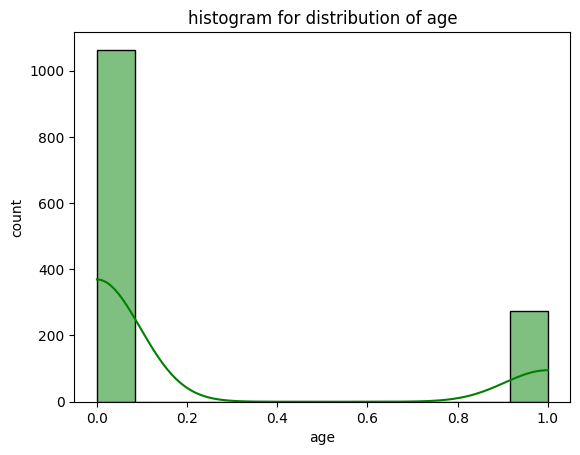

In [46]:
sns.histplot(df['smoker'],kde=True,color="green")
plt.xlabel("age")
plt.ylabel("count")
plt.title("histogram for distribution of age")
plt.show()

In [47]:
corr = df.corr(numeric_only=True)

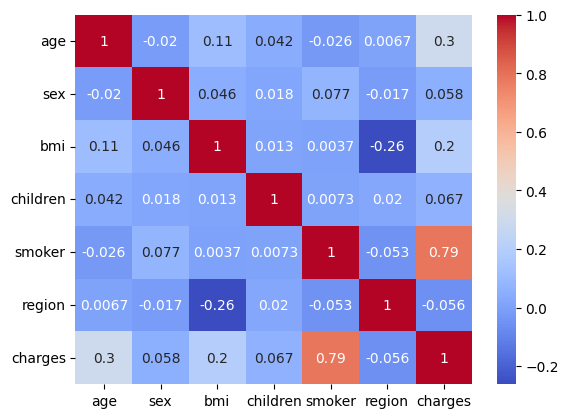

In [48]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [49]:
X = df.drop('charges',axis=1)
y = df['charges']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
model_dr = DecisionTreeRegressor()

In [55]:
parameters = {
    "max_depth" : [1,3,6,10],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,5,7],
    "criterion" : ["squared_error","friedman_mse","absolute_error","poisson"]
}

In [56]:
rs_dr = RandomizedSearchCV(
    estimator = model_dr,
    param_distributions=parameters,
    n_iter=10,
    cv=5,
    verbose=0,
    n_jobs=-1,
)

In [57]:
rs_dr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 3, 6, 10],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [2, 5, 10]})

In [58]:
rs_dr.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=5)

In [59]:
y_pred_train = rs_dr.predict(X_train)
y_pred_test = rs_dr.predict(X_test)

In [60]:
# decision tree accuracy
print("r2_score for testing",r2_score(y_test,y_pred_test))
print("r2_score for training",r2_score(y_train,y_pred_train))

r2_score for testing 0.8586768845284986
r2_score for training 0.8539804688006176


In [61]:
model_rf = RandomForestRegressor()

In [62]:
parameters_rf = {
    "n_estimators" : [10,50,100,200],
    "max_depth" : [1,3,6,10,20],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,7,10]

}

In [63]:
rs_rf = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=parameters_rf,
    n_iter=20,
    cv=5,
    scoring="r2",
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [64]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 6, 10, 20],
                                        'min_samples_leaf': [1, 2, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [65]:
rs_rf.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=10)

In [66]:
y_pred_train_rf = rs_rf.predict(X_train)
y_pred_test_rf = rs_rf.predict(X_test)

In [67]:
# random forest accuracy
print("r2_score for testing",r2_score(y_test,y_pred_test_rf))
print("r2_score for training",r2_score(y_train,y_pred_train_rf))

r2_score for testing 0.8768554863620563
r2_score for training 0.8842470533003934


In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
model_lr = LinearRegression()

In [72]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

In [74]:
# linear regression accuracy
print("r2_score for testing",r2_score(y_test,y_pred_test_lr))
print("r2_score for training",r2_score(y_train,y_pred_train_lr))


r2_score for testing 0.772734663680803
r2_score for training 0.7327388926079046


In [75]:
# decision tree accuracy
print("r2_score for testing",r2_score(y_test,y_pred_test))
print("r2_score for training",r2_score(y_train,y_pred_train))

r2_score for testing 0.8586768845284986
r2_score for training 0.8539804688006176


In [76]:
# random forest accuracy
print("r2_score for testing",r2_score(y_test,y_pred_test_rf))
print("r2_score for training",r2_score(y_train,y_pred_train_rf))

r2_score for testing 0.8768554863620563
r2_score for training 0.8842470533003934


In [77]:
import pickle as pkl
with open("model_usa.pkl", "wb") as fs:
  pkl.dump(rs_dr,fs)